In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

C:\Users\Mukesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


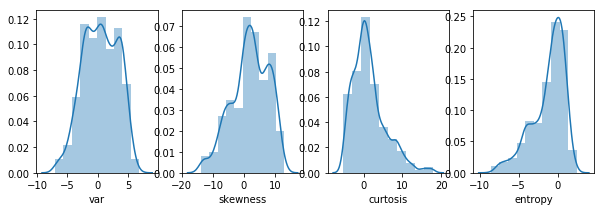

In [10]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')


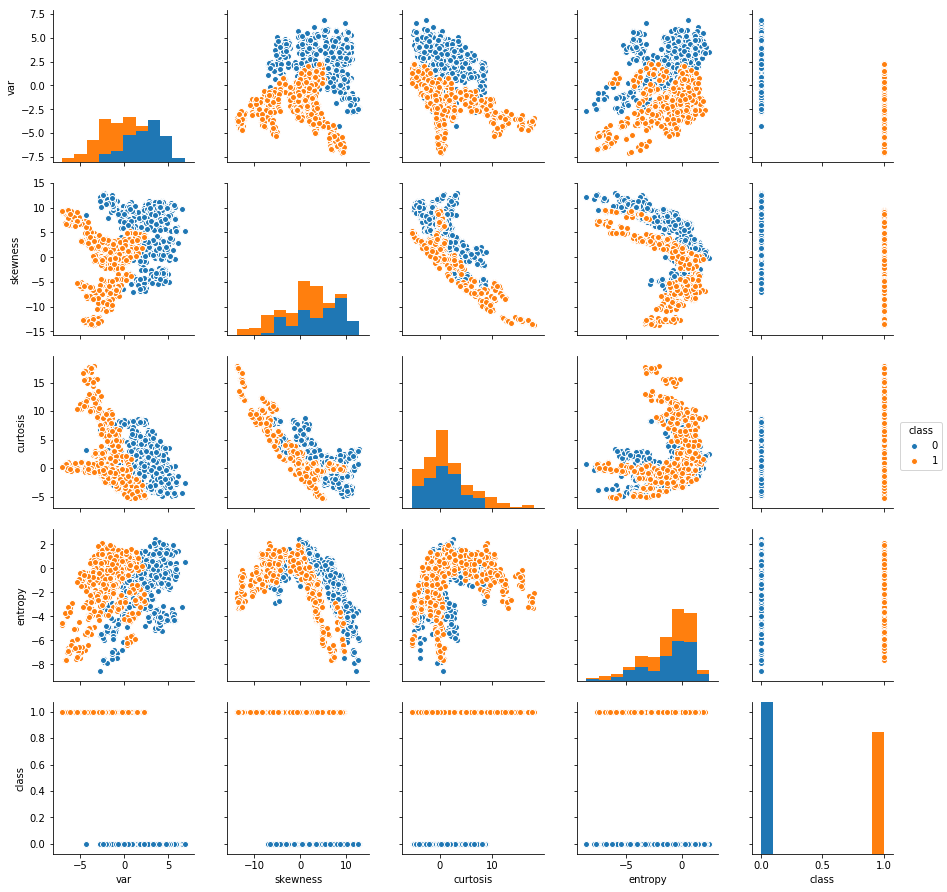

In [11]:
sns.pairplot(df, hue="class" )

In [12]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import StandardScaler


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [14]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [15]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00091241  0.26106526 -0.37965807  0.2855868 ]
 [ 0.26106526  1.00091241 -0.78600078 -0.52370267]
 [-0.37965807 -0.78600078  1.00091241  0.32384024]
 [ 0.2855868  -0.52370267  0.32384024  1.00091241]]
Eigenvectors 
[[-0.24410388 -0.75674709  0.60295351  0.06476264]
 [-0.63914113  0.0457533  -0.11988157 -0.75830974]
 [ 0.61378454  0.15345344  0.50421613 -0.58778114]
 [ 0.3939295  -0.63379217 -0.60649943 -0.27438198]]

Eigenvalues 
[2.17821749 1.30130064 0.34425337 0.17987814]


In [16]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.40579687  86.90865691  95.50714586 100.        ]


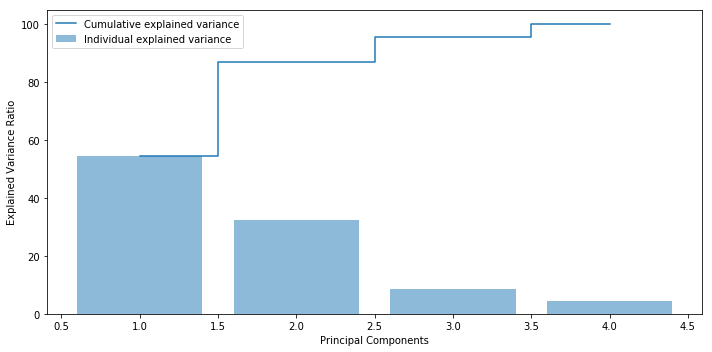

In [17]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [18]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.178217487681948,
  array([-0.24410388, -0.63914113,  0.61378454,  0.3939295 ])),
 (1.301300637373192,
  array([-0.75674709,  0.0457533 ,  0.15345344, -0.63379217])),
 (0.34425337148288965,
  array([ 0.60295351, -0.11988157,  0.50421613, -0.60649943])),
 (0.17987813849846418,
  array([ 0.06476264, -0.75830974, -0.58778114, -0.27438198]))]

In [19]:
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)

Matrix W:
 [[-0.24410388 -0.75674709]
 [-0.63914113  0.0457533 ]
 [ 0.61378454  0.15345344]
 [ 0.3939295  -0.63379217]]


In [20]:
X_sd_pca.shape, w.shape, X_sd_pca.shape

((1097, 2), (4, 2), (1097, 2))

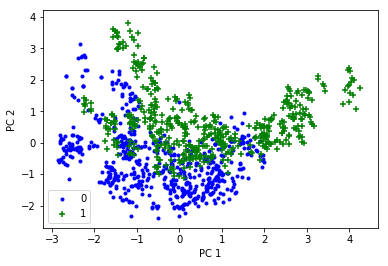

In [21]:
# For the scatter plot, we take data points from X_train_pca PC1 and PC2 for all those cases where y_train lable is L 
# where L  can vary from 1,2,3.
# For each L, a corresponding color and marker is used in the plot

colors = ['b', 'g']
markers = ['.', '+']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_sd_pca[y_train==l, 0], X_sd_pca[y_train==l , 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



In [23]:
clf = SVC()
clf.fit(X_train_sd, y_train)
print ('score', clf.score(X_test_sd, y_test))


score 1.0


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
#model = LogisticRegression(solver='lbfgs' , max_iter=5000 , multi_class='multinomial')
model = LogisticRegression()
model.fit(X_train_sd, y_train)

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
model.score(X_test_sd , y_test)

0.9854545454545455

In [27]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_sd, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
model.score(X_test_sd , y_test) 

0.8472727272727273

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict



scores = cross_val_score(model, X_test_sd , y_test, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.75862069 0.86206897 0.92857143 0.92592593 0.85185185 0.88888889
 0.77777778 0.77777778 0.85185185 0.88888889] [0.75862069 0.86206897 0.92857143 0.92592593 0.85185185 0.88888889
 0.77777778 0.77777778 0.85185185 0.88888889]
Average score: 0.8512224046706806


In [30]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [31]:
# configure bootstrap
n_iterations = 20       # Number of bootstrap samples to create
n_size = int(len(df) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

values = df.values

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)


0.8559113300492611
0.8470873786407767
0.8391777509068924
0.8472049689440994
0.8424908424908425
0.8375149342891278
0.833130328867235
0.8462469733656174
0.8475609756097561
0.8403465346534653
0.8359659781287971
0.847001223990208
0.8199279711884754
0.8501827040194885
0.8318804483188045
0.8311057108140948
0.8728179551122195
0.8341523341523341
0.8218181818181818
0.8274173806609547
0.8300733496332519
0.8682926829268293
0.8465346534653465
0.8618988902589396
0.8333333333333334
0.8484848484848485
0.8518971848225214
0.8341645885286783
0.8585247883917775
0.8504326328800988
0.8451219512195122
0.8642424242424243
0.838036809815951
0.8597785977859779
0.8466111771700356
0.8819951338199513
0.8663366336633663
0.8567901234567902
0.8455971049457177
0.8414043583535109
0.8368355995055624
0.8620268620268621
0.8393719806763285
0.8191747572815534
0.8485958485958486
0.8383961117861483
0.8238916256157636
0.8594132029339854
0.8321167883211679
0.8323057953144266
0.848851269649335
0.8753026634382567
0.85362853628536

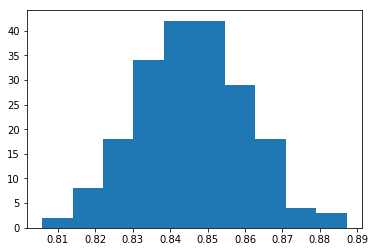

99.0 confidence interval 80.8% and 88.4%


In [35]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.99                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))